# NLP Result Analysis
Analyse a excel sheet of NLP classification results.
Template is filled in 

Use yaml config

In [31]:
use_config_file = True
config_file = './../resources/config/result-analysis-tn-tn-val.yaml'
cfg = None
if use_config_file:
    import yaml
    with open(config_file, 'r') as yaml_file:
        cfg = yaml.safe_load(yaml_file)


Set path of excel sheet

In [32]:
path_excel_sheet = "./../resources/data/context_results.xlsx"
if use_config_file:
    path_excel_sheet = cfg['path_excel_sheet']


Set output directory

In [33]:
path_output_dir = "./../resources/"

out_file = None
if use_config_file:
    path_output_dir = cfg['path_output_dir']
try:
    from pathlib import Path
    Path(path_output_dir).mkdir(parents=True, exist_ok=True)
    out_file = open(path_output_dir + "/"+ "result-analysis-out.txt", "w")
except OSError:
    print ("Creation of the directory %s failed" % path_output_dir)
else:
    print ("Successfully created the directory %s " % path_output_dir)
    

Successfully created the directory ./../resources/results/20200116-tnm-tn-val-merge 


Set label and classification columns

In [34]:
column_actual = 'label longembolie'
column_predicted = 'target-snomedct:59282003'

if use_config_file:
    column_actual = cfg['column_actual']
    column_predicted = cfg['column_predicted']

Read columns and determine values, in case of key error, make sure the columns are set correctly

In [35]:
import pandas
df = pandas.read_excel(path_excel_sheet, header=0)

actual_values = df[column_actual].value_counts().index.tolist() 
predicted_values = df[column_predicted].value_counts().index.tolist() 

print('actual category values:', actual_values)
print('predicted category values:', predicted_values)
all_values = list(set(actual_values).union(set(predicted_values)))
print(all_values)

actual category values: ['??', 'T4N2', 'T1cN0', 'T3N2', 'T4N0', 'T3N3', 'T3N0', 'T2bN2', 'T1cN2', 'T4N3', 'T2aN0', 'T2aN2', 'T2N2', 'T4?', 'T1cN1', 'T4N1', 'T1bN0', 'T2bN0', 'T2bN1', 'T2bN3', 'T2N0', '?N0', 'T2aN1', 'T1bN3', 'T1bN2', 'T1cN3', 'T2N3']
predicted category values: ['T4N2', 'T1cN0', 'T2bN2', 'T3N2', 'T4N3', 'T4N0', 'T3N0', 'T2aN0', 'T1cN2', 'T3N3', 'T2aN3', 'T4N1', 'T2aN2', 'T0N0', 'T2bN3', 'T1bN0', 'T2aN1', 'T1cN3', 'T1cN1', 'T0N3', 'T2N2', 'T2bN0', 'T2N3', 'T1bN2', 'T1bN3', 'T3N1', 'T2N0', 'T2bN1', 'T0N2']
['T3N0', 'T1cN0', 'T1cN2', 'T1bN0', 'T4N3', '??', 'T1bN3', 'T4N1', 'T0N0', 'T4?', 'T1cN3', 'T2aN0', 'T0N2', 'T0N3', 'T4N0', 'T4N2', 'T2N2', 'T2bN3', 'T3N3', 'T2aN3', 'T2bN0', 'T3N1', '?N0', 'T3N2', 'T2N0', 'T1bN2', 'T2aN2', 'T2aN1', 'T2bN2', 'T1cN1', 'T2bN1', 'T2N3']


Manually set valid values from actual and predicted categories (other values will be ignored)

In [36]:
valid_values = []
ignored_values = []

if use_config_file and 'valid_values' in cfg:
    valid_values = cfg['valid_values']
if use_config_file and 'ignored_values' in cfg:
    ignored_values = cfg['ignored_values']

if not valid_values or len(valid_values) == 0:
    valid_values = all_values
    
def matches_ignored(x):
    for ignored in ignored_values:
        if ignored in x:
            return True
    return False
    
valid_values = [] 
for x in all_values:
    if not matches_ignored(x):
        valid_values.append(x)

valid_values.sort()

Check valid values

In [37]:
df_valid = df[df[column_actual].isin(valid_values)]

actual_index_valid = df_valid[column_actual].value_counts().index.tolist() 
predicted_index_valid = df_valid[column_actual].value_counts().index.tolist() 

print('actual category values:', actual_index_valid)
print('predicted category values:', predicted_index_valid)

actual category values: ['T4N2', 'T1cN0', 'T3N2', 'T4N0', 'T3N0', 'T2bN2', 'T3N3', 'T2aN2', 'T1cN2', 'T2aN0', 'T4N3', 'T1cN1', 'T2N2', 'T1bN0', 'T4N1', 'T2bN0', 'T2bN1', 'T2bN3', 'T2N3', 'T1bN3', 'T1bN2', 'T1cN3', 'T2aN1', 'T2N0']
predicted category values: ['T4N2', 'T1cN0', 'T3N2', 'T4N0', 'T3N0', 'T2bN2', 'T3N3', 'T2aN2', 'T1cN2', 'T2aN0', 'T4N3', 'T1cN1', 'T2N2', 'T1bN0', 'T4N1', 'T2bN0', 'T2bN1', 'T2bN3', 'T2N3', 'T1bN3', 'T1bN2', 'T1cN3', 'T2aN1', 'T2N0']


Histograms Original

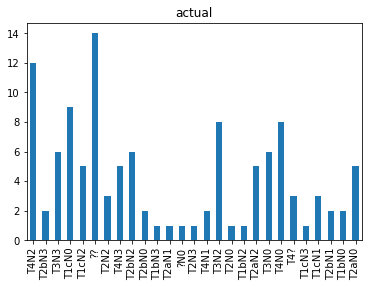

In [38]:
actual_bar_plt = df[column_actual].value_counts(sort = False).plot(kind='bar', title='actual')

Histograms Valid Values only

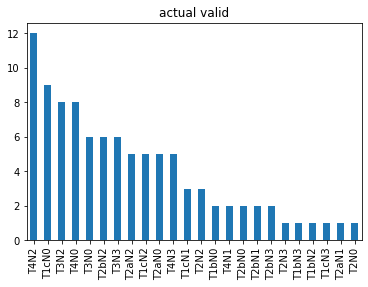

In [39]:
actual_valid_bar_plot = df_valid[column_actual].value_counts().plot(kind='bar', title='actual valid')

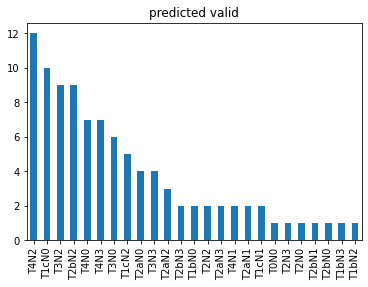

In [40]:
predicted_valid_bar_plt = df_valid[column_predicted].value_counts().plot(kind='bar', title='predicted valid')

Compute accuracy

In [41]:
df = df_valid
accuracy = df[df[column_predicted] == df[column_actual]].shape[0]/df.shape[0]
print("Accuracy = " + str(round(accuracy * 100, 2)) + "%")
out_file.write("Accuracy = " + str(round(accuracy * 100, 2)) + "%" + "\n\n")

Accuracy = 78.35%


19

F-scores

In [42]:
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix
from sklearn.utils.multiclass import unique_labels
y_actu = pandas.Series(df[column_actual], name='Actual')
y_pred = pandas.Series(df[column_predicted], name='Predicted')

labels = unique_labels(y_actu, y_pred)
prf = precision_recall_fscore_support(y_actu, y_pred, average=None, labels=valid_values)
evaldf = pandas.DataFrame({"Precision": prf[0], "Recall": prf[1], "F-score": prf[2]}, index=valid_values)
print(evaldf)
out_file.write(str(evaldf) + "\n\n")

       Precision    Recall   F-score
T0N0    0.000000  0.000000  0.000000
T0N2    0.000000  0.000000  0.000000
T0N3    0.000000  0.000000  0.000000
T1bN0   1.000000  1.000000  1.000000
T1bN2   1.000000  1.000000  1.000000
T1bN3   1.000000  1.000000  1.000000
T1cN0   0.900000  1.000000  0.947368
T1cN1   1.000000  0.666667  0.800000
T1cN2   0.800000  0.800000  0.800000
T1cN3   0.000000  0.000000  0.000000
T2N0    1.000000  1.000000  1.000000
T2N2    1.000000  0.666667  0.800000
T2N3    1.000000  1.000000  1.000000
T2aN0   1.000000  0.800000  0.888889
T2aN1   0.500000  1.000000  0.666667
T2aN2   0.666667  0.400000  0.500000
T2aN3   0.000000  0.000000  0.000000
T2bN0   1.000000  0.500000  0.666667
T2bN1   1.000000  0.500000  0.666667
T2bN2   0.666667  1.000000  0.800000
T2bN3   1.000000  1.000000  1.000000
T3N0    0.833333  0.833333  0.833333
T3N1    0.000000  0.000000  0.000000
T3N2    0.888889  1.000000  0.941176
T3N3    1.000000  0.666667  0.800000
T4N0    0.857143  0.750000  0.800000
T

c:\users\sander.puts\ideaprojects\work\venv\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\sander.puts\ideaprojects\work\venv\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1111

Create confusion matrix

In [43]:
confusion_matrix = pandas.crosstab(y_actu, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)
print("CONFUSION MATRIX")
print(confusion_matrix)
out_file.write(str(confusion_matrix))

CONFUSION MATRIX
Predicted  T0N0  T1bN0  T1bN2  T1bN3  T1cN0  T1cN1  T1cN2  T2N0  T2N2  T2N3  \
Actual                                                                        
T1bN0         0      2      0      0      0      0      0     0     0     0   
T1bN2         0      0      1      0      0      0      0     0     0     0   
T1bN3         0      0      0      1      0      0      0     0     0     0   
T1cN0         0      0      0      0      9      0      0     0     0     0   
T1cN1         0      0      0      0      1      2      0     0     0     0   
T1cN2         0      0      0      0      0      0      4     0     0     0   
T1cN3         0      0      0      0      0      0      1     0     0     0   
T2N0          0      0      0      0      0      0      0     1     0     0   
T2N2          0      0      0      0      0      0      0     0     2     0   
T2N3          0      0      0      0      0      0      0     0     0     1   
T2aN0         1      0      0      

4263

Plot confusion matrix

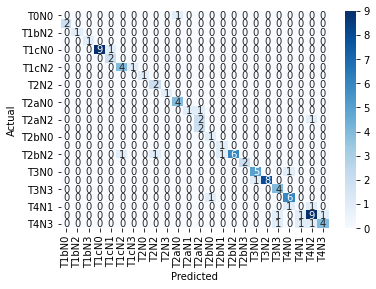

In [44]:
import seaborn
import matplotlib
data = {'y_Actual':    df_valid[column_predicted],
        'y_Predicted': df_valid[column_actual]
        }

df = pandas.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pandas.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

confusion_matrix_heatmap = seaborn.heatmap(confusion_matrix, annot=True, cmap=matplotlib.cm.Blues)

Save confusion matix figure to file

In [45]:
file_type_eps = False
if file_type_eps:
    confusion_matrix_heatmap.figure.savefig(path_output_dir + "/" + "confusion_matrix.eps", dict="eps")
else:
   confusion_matrix_heatmap.figure.savefig(path_output_dir + "/" + "confusion_matrix.png")

out_file.close()